Making one extra dataset that does include all the tiles previously excluded from the normal set.

In [21]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from scipy.misc import imresize
from mammo_utils import remove_white_from_image, random_flip_image
%matplotlib inline

In [31]:
## function to read images contained in a directory, create slices from them and return a numpy array of the slices
## with labels. The threshholds are used to filter out images which are not usable or interesting. 
def create_slices(path, output=True, var_upper_threshhold=0, var_lower_threshhold=0, mean_threshold=0, stride=200):
    files = os.listdir(path)
    normal_slices = []
    normal_labels = []
    
    i = 0
    for file in files:
        if output:
            print(i, "-", file)
        i += 1
        tiles = slice_normal_image(os.path.join(path, file), var_upper_threshold=var_upper_threshhold, var_lower_threshold=var_lower_threshhold, mean_threshold=mean_threshold, stride=stride)
        for tile in tiles:
            normal_slices.append(tile)
            normal_labels.append("NORMAL")
        
    assert(len(normal_slices) == len(normal_labels))
    
    return np.array(normal_slices), np.array(normal_labels)

# in this version of the function we are going to extract the tiles at 598 x 598 and then size them down to 299x299
def slice_normal_image(path, var_upper_threshold=0, var_lower_threshold=0, mean_threshold=0, stride=350):
    # load the image
    img = PIL.Image.open(path)
    
    # convert the image to RGB
    img = PIL.ImageMath.eval('im/256', {'im':img}).convert('L')
    
    # convert to an array
    img = np.array(img)
    
    # remove white pixels
    img[img == 255] = 0
    
    # remove 7% from each side of image to eliminate borders
#     h, w = img.shape
#     hmargin = int(h * 0.07)
#     wmargin = int(w * 0.07)
#     img = img[hmargin:h-hmargin, wmargin:w-wmargin]
    
    # slice the image into 598X598 tiles
    size = 598
    tiles = [img[x:x+size,y:y+size] for x in range(0,img.shape[0],stride) for y in range(0,img.shape[1],stride)]
    usable_tiles = []
    
    # for each tile:
    for i in range(len(tiles)):
        use_image = False
        # make sure tile has correct shape
        if tiles[i].shape == (size,size):
            # make sure the tile doesn't have too many white or black pixels, that indicates it is not useful
            if (np.sum(np.sum(tiles[i] >= 225)) < 100) and (np.sum(np.sum(tiles[i] <= 20)) <= 50000):
                # make sure tile has stuff in it
                if np.mean(tiles[i]) >= mean_threshold:
                    # make sure the tile contains image and not mostly empty space
                    if np.var(tiles[i]) <= var_upper_threshold:
                        if np.var(tiles[i]) >= var_lower_threshold:
                            use_image = True
            # if the image would normally be excluded, we'll include it
            if not use_image:
                # after flipping a coin to keep the size of the data reasonable
                coin = np.random.binomial(1, 0.2)
                if coin:
                    # size the tile down to 299x299
                    cropped_img = imresize(tiles[i], (299,299))
                    # reshape the tile so they will work with the convnet
                    usable_tiles.append(random_flip_image(cropped_img.reshape(299,299,1)))

    return usable_tiles

In [32]:
# the DBA scanned images seem to not be as good quality as images from the other scanners. I am using tighter
# thresholds here to try to keep the images of decent quality with usable content, no text and as little static as possible
path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\DBA pngs"

dba_slices, dba_labels = create_slices(path, var_upper_threshhold=1500, var_lower_threshhold=20, mean_threshold=38, stride=350)

0 - A_0014_1.LEFT_CC.LJPEG.png


C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


1 - A_0014_1.LEFT_MLO.LJPEG.png
2 - A_0014_1.RIGHT_CC.LJPEG.png
3 - A_0014_1.RIGHT_MLO.LJPEG.png
4 - A_0015_1.LEFT_CC.LJPEG.png
5 - A_0015_1.LEFT_MLO.LJPEG.png
6 - A_0015_1.RIGHT_CC.LJPEG.png
7 - A_0015_1.RIGHT_MLO.LJPEG.png
8 - A_0016_1.LEFT_CC.LJPEG.png
9 - A_0016_1.LEFT_MLO.LJPEG.png
10 - A_0016_1.RIGHT_CC.LJPEG.png
11 - A_0016_1.RIGHT_MLO.LJPEG.png
12 - A_0018_1.LEFT_CC.LJPEG.png
13 - A_0018_1.LEFT_MLO.LJPEG.png
14 - A_0018_1.RIGHT_CC.LJPEG.png
15 - A_0018_1.RIGHT_MLO.LJPEG.png
16 - A_0020_1.LEFT_CC.LJPEG.png
17 - A_0020_1.LEFT_MLO.LJPEG.png
18 - A_0020_1.RIGHT_CC.LJPEG.png
19 - A_0020_1.RIGHT_MLO.LJPEG.png
20 - A_0022_1.LEFT_CC.LJPEG.png
21 - A_0022_1.LEFT_MLO.LJPEG.png
22 - A_0022_1.RIGHT_CC.LJPEG.png
23 - A_0022_1.RIGHT_MLO.LJPEG.png
24 - A_0024_1.LEFT_CC.LJPEG.png
25 - A_0024_1.LEFT_MLO.LJPEG.png
26 - A_0024_1.RIGHT_CC.LJPEG.png
27 - A_0024_1.RIGHT_MLO.LJPEG.png
28 - A_0026_1.LEFT_CC.LJPEG.png
29 - A_0026_1.LEFT_MLO.LJPEG.png
30 - A_0026_1.RIGHT_CC.LJPEG.png
31 - A_0026_1.RIGHT

246 - A_0099_1.RIGHT_CC.LJPEG.png
247 - A_0099_1.RIGHT_MLO.LJPEG.png
248 - A_0108_1.LEFT_CC.LJPEG.png
249 - A_0108_1.LEFT_MLO.LJPEG.png
250 - A_0108_1.RIGHT_CC.LJPEG.png
251 - A_0108_1.RIGHT_MLO.LJPEG.png
252 - A_0109_1.LEFT_CC.LJPEG.png
253 - A_0109_1.LEFT_MLO.LJPEG.png
254 - A_0109_1.RIGHT_CC.LJPEG.png
255 - A_0109_1.RIGHT_MLO.LJPEG.png
256 - A_0110_1.LEFT_CC.LJPEG.png
257 - A_0110_1.LEFT_MLO.LJPEG.png
258 - A_0110_1.RIGHT_CC.LJPEG.png
259 - A_0110_1.RIGHT_MLO.LJPEG.png
260 - A_0111_1.LEFT_CC.LJPEG.png
261 - A_0111_1.LEFT_MLO.LJPEG.png
262 - A_0111_1.RIGHT_CC.LJPEG.png
263 - A_0111_1.RIGHT_MLO.LJPEG.png
264 - A_0112_1.LEFT_CC.LJPEG.png
265 - A_0112_1.LEFT_MLO.LJPEG.png
266 - A_0112_1.RIGHT_CC.LJPEG.png
267 - A_0112_1.RIGHT_MLO.LJPEG.png
268 - A_0114_1.LEFT_CC.LJPEG.png
269 - A_0114_1.LEFT_MLO.LJPEG.png
270 - A_0114_1.RIGHT_CC.LJPEG.png
271 - A_0114_1.RIGHT_MLO.LJPEG.png
272 - A_0115_1.LEFT_CC.LJPEG.png
273 - A_0115_1.LEFT_MLO.LJPEG.png
274 - A_0115_1.RIGHT_CC.LJPEG.png
275 - A_0115_1

487 - A_0220_1.RIGHT_MLO.LJPEG.png
488 - A_0221_1.LEFT_CC.LJPEG.png
489 - A_0221_1.LEFT_MLO.LJPEG.png
490 - A_0221_1.RIGHT_CC.LJPEG.png
491 - A_0221_1.RIGHT_MLO.LJPEG.png
492 - A_0222_1.LEFT_CC.LJPEG.png
493 - A_0222_1.LEFT_MLO.LJPEG.png
494 - A_0222_1.RIGHT_CC.LJPEG.png
495 - A_0222_1.RIGHT_MLO.LJPEG.png
496 - A_0223_1.LEFT_CC.LJPEG.png
497 - A_0223_1.LEFT_MLO.LJPEG.png
498 - A_0223_1.RIGHT_CC.LJPEG.png
499 - A_0223_1.RIGHT_MLO.LJPEG.png
500 - A_0224_1.LEFT_CC.LJPEG.png
501 - A_0224_1.LEFT_MLO.LJPEG.png
502 - A_0224_1.RIGHT_CC.LJPEG.png
503 - A_0224_1.RIGHT_MLO.LJPEG.png
504 - A_0225_1.LEFT_CC.LJPEG.png
505 - A_0225_1.LEFT_MLO.LJPEG.png
506 - A_0225_1.RIGHT_CC.LJPEG.png
507 - A_0225_1.RIGHT_MLO.LJPEG.png
508 - A_0226_1.LEFT_CC.LJPEG.png
509 - A_0226_1.LEFT_MLO.LJPEG.png
510 - A_0226_1.RIGHT_CC.LJPEG.png
511 - A_0226_1.RIGHT_MLO.LJPEG.png
512 - A_0227_1.LEFT_CC.LJPEG.png
513 - A_0227_1.LEFT_MLO.LJPEG.png
514 - A_0227_1.RIGHT_CC.LJPEG.png
515 - A_0227_1.RIGHT_MLO.LJPEG.png
516 - A_0229_

728 - A_0285_1.LEFT_CC.LJPEG.png
729 - A_0285_1.LEFT_MLO.LJPEG.png
730 - A_0285_1.RIGHT_CC.LJPEG.png
731 - A_0285_1.RIGHT_MLO.LJPEG.png
732 - A_0286_1.LEFT_CC.LJPEG.png
733 - A_0286_1.LEFT_MLO.LJPEG.png
734 - A_0286_1.RIGHT_CC.LJPEG.png
735 - A_0286_1.RIGHT_MLO.LJPEG.png
736 - A_0287_1.LEFT_CC.LJPEG.png
737 - A_0287_1.LEFT_MLO.LJPEG.png
738 - A_0287_1.RIGHT_CC.LJPEG.png
739 - A_0287_1.RIGHT_MLO.LJPEG.png
740 - A_0290_1.LEFT_CC.LJPEG.png
741 - A_0290_1.LEFT_MLO.LJPEG.png
742 - A_0290_1.RIGHT_CC.LJPEG.png
743 - A_0290_1.RIGHT_MLO.LJPEG.png
744 - A_0292_1.LEFT_CC.LJPEG.png
745 - A_0292_1.LEFT_MLO.LJPEG.png
746 - A_0292_1.RIGHT_CC.LJPEG.png
747 - A_0292_1.RIGHT_MLO.LJPEG.png
748 - A_0293_1.LEFT_CC.LJPEG.png
749 - A_0293_1.LEFT_MLO.LJPEG.png
750 - A_0293_1.RIGHT_CC.LJPEG.png
751 - A_0293_1.RIGHT_MLO.LJPEG.png
752 - A_0294_1.LEFT_CC.LJPEG.png
753 - A_0294_1.LEFT_MLO.LJPEG.png
754 - A_0294_1.RIGHT_CC.LJPEG.png
755 - A_0294_1.RIGHT_MLO.LJPEG.png
756 - A_0295_1.LEFT_CC.LJPEG.png
757 - A_0295_1.

969 - A_0359_1.LEFT_MLO.LJPEG.png
970 - A_0359_1.RIGHT_CC.LJPEG.png
971 - A_0359_1.RIGHT_MLO.LJPEG.png
972 - A_0360_1.LEFT_CC.LJPEG.png
973 - A_0360_1.LEFT_MLO.LJPEG.png
974 - A_0360_1.RIGHT_CC.LJPEG.png
975 - A_0360_1.RIGHT_MLO.LJPEG.png
976 - A_0361_1.LEFT_CC.LJPEG.png
977 - A_0361_1.LEFT_MLO.LJPEG.png
978 - A_0361_1.RIGHT_CC.LJPEG.png
979 - A_0361_1.RIGHT_MLO.LJPEG.png
980 - A_0362_1.LEFT_CC.LJPEG.png
981 - A_0362_1.LEFT_MLO.LJPEG.png
982 - A_0362_1.RIGHT_CC.LJPEG.png
983 - A_0362_1.RIGHT_MLO.LJPEG.png
984 - A_0364_1.LEFT_CC.LJPEG.png
985 - A_0364_1.LEFT_MLO.LJPEG.png
986 - A_0364_1.RIGHT_CC.LJPEG.png
987 - A_0364_1.RIGHT_MLO.LJPEG.png
988 - A_0365_1.LEFT_CC.LJPEG.png
989 - A_0365_1.LEFT_MLO.LJPEG.png
990 - A_0365_1.RIGHT_CC.LJPEG.png
991 - A_0365_1.RIGHT_MLO.LJPEG.png
992 - A_0366_1.LEFT_CC.LJPEG.png
993 - A_0366_1.LEFT_MLO.LJPEG.png
994 - A_0366_1.RIGHT_CC.LJPEG.png
995 - A_0366_1.RIGHT_MLO.LJPEG.png
996 - A_0367_1.LEFT_CC.LJPEG.png
997 - A_0367_1.LEFT_MLO.LJPEG.png
998 - A_0367_1

1204 - A_0467_1.LEFT_CC.LJPEG.png
1205 - A_0467_1.LEFT_MLO.LJPEG.png
1206 - A_0467_1.RIGHT_CC.LJPEG.png
1207 - A_0467_1.RIGHT_MLO.LJPEG.png
1208 - A_0468_1.LEFT_CC.LJPEG.png
1209 - A_0468_1.LEFT_MLO.LJPEG.png
1210 - A_0468_1.RIGHT_CC.LJPEG.png
1211 - A_0468_1.RIGHT_MLO.LJPEG.png
1212 - A_0469_1.LEFT_CC.LJPEG.png
1213 - A_0469_1.LEFT_MLO.LJPEG.png
1214 - A_0469_1.RIGHT_CC.LJPEG.png
1215 - A_0469_1.RIGHT_MLO.LJPEG.png
1216 - A_0470_1.LEFT_CC.LJPEG.png
1217 - A_0470_1.LEFT_MLO.LJPEG.png
1218 - A_0470_1.RIGHT_CC.LJPEG.png
1219 - A_0470_1.RIGHT_MLO.LJPEG.png
1220 - A_0471_1.LEFT_CC.LJPEG.png
1221 - A_0471_1.LEFT_MLO.LJPEG.png
1222 - A_0471_1.RIGHT_CC.LJPEG.png
1223 - A_0471_1.RIGHT_MLO.LJPEG.png
1224 - A_0472_1.LEFT_CC.LJPEG.png
1225 - A_0472_1.LEFT_MLO.LJPEG.png
1226 - A_0472_1.RIGHT_CC.LJPEG.png
1227 - A_0472_1.RIGHT_MLO.LJPEG.png
1228 - A_0473_1.LEFT_CC.LJPEG.png
1229 - A_0473_1.LEFT_MLO.LJPEG.png
1230 - A_0473_1.RIGHT_CC.LJPEG.png
1231 - A_0473_1.RIGHT_MLO.LJPEG.png
1232 - A_0474_1.LEFT

1439 - A_0562_1.RIGHT_MLO.LJPEG.png
1440 - A_0565_1.LEFT_CC.LJPEG.png
1441 - A_0565_1.LEFT_MLO.LJPEG.png
1442 - A_0565_1.RIGHT_CC.LJPEG.png
1443 - A_0565_1.RIGHT_MLO.LJPEG.png
1444 - A_0566_1.LEFT_CC.LJPEG.png
1445 - A_0566_1.LEFT_MLO.LJPEG.png
1446 - A_0566_1.RIGHT_CC.LJPEG.png
1447 - A_0566_1.RIGHT_MLO.LJPEG.png
1448 - A_0567_1.LEFT_CC.LJPEG.png
1449 - A_0567_1.LEFT_MLO.LJPEG.png
1450 - A_0567_1.RIGHT_CC.LJPEG.png
1451 - A_0567_1.RIGHT_MLO.LJPEG.png
1452 - A_0568_1.LEFT_CC.LJPEG.png
1453 - A_0568_1.LEFT_MLO.LJPEG.png
1454 - A_0568_1.RIGHT_CC.LJPEG.png
1455 - A_0568_1.RIGHT_MLO.LJPEG.png
1456 - A_0569_1.LEFT_CC.LJPEG.png
1457 - A_0569_1.LEFT_MLO.LJPEG.png
1458 - A_0569_1.RIGHT_CC.LJPEG.png
1459 - A_0569_1.RIGHT_MLO.LJPEG.png
1460 - A_0570_1.LEFT_CC.LJPEG.png
1461 - A_0570_1.LEFT_MLO.LJPEG.png
1462 - A_0570_1.RIGHT_CC.LJPEG.png
1463 - A_0570_1.RIGHT_MLO.LJPEG.png
1464 - A_0571_1.LEFT_CC.LJPEG.png
1465 - A_0571_1.LEFT_MLO.LJPEG.png
1466 - A_0571_1.RIGHT_CC.LJPEG.png
1467 - A_0571_1.RIGH

In [33]:
print("DBA Slices:", len(dba_slices))
print("DBA Labels:", len(dba_labels))

DBA Slices: 18658
DBA Labels: 18658


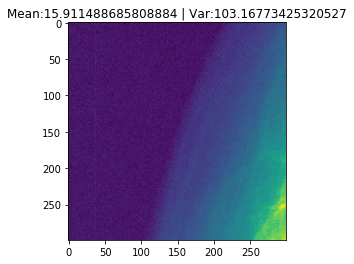

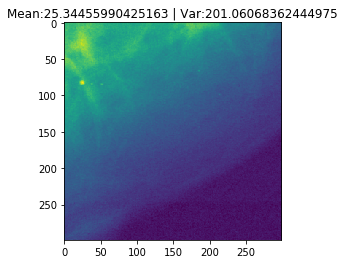

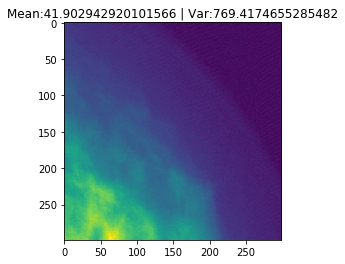

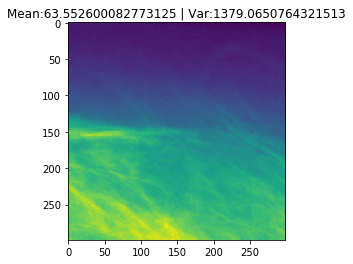

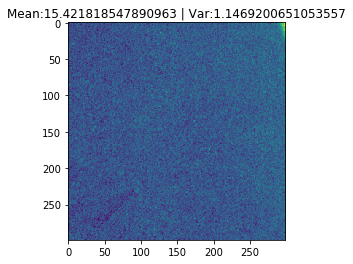

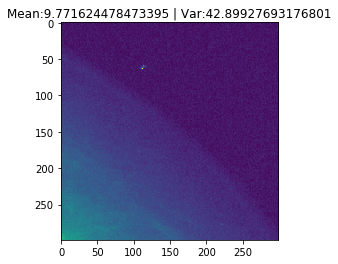

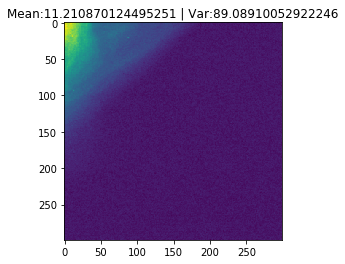

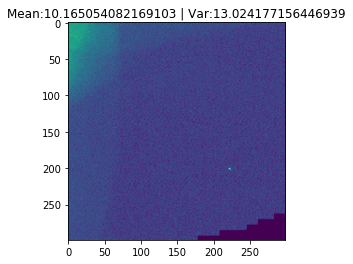

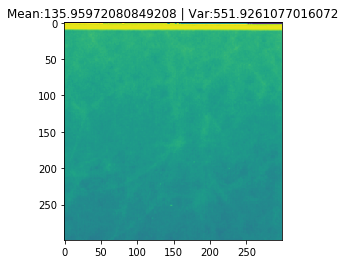

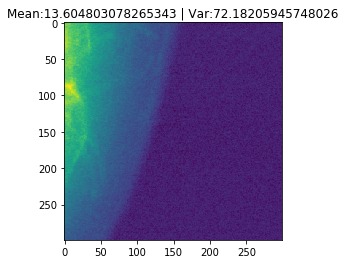

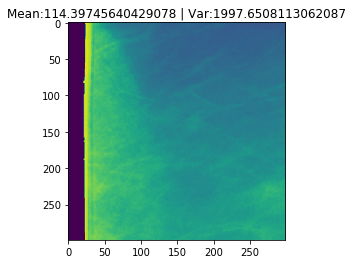

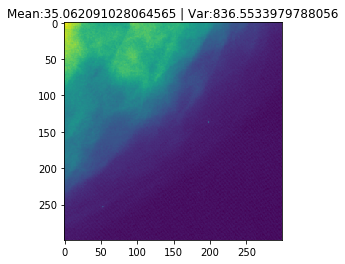

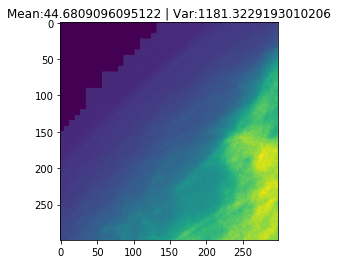

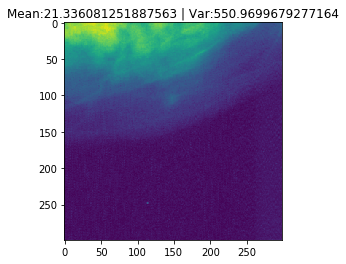

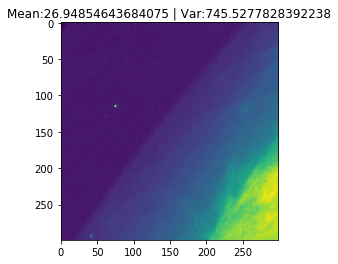

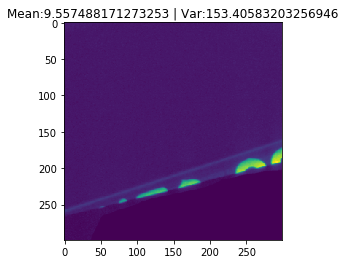

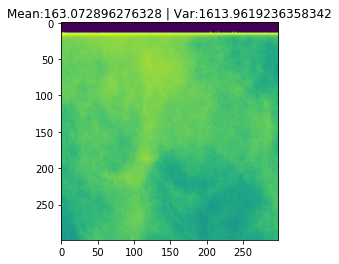

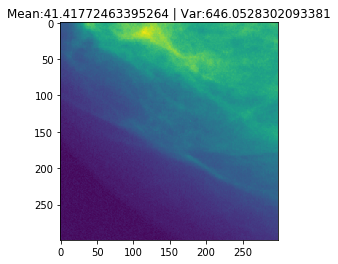

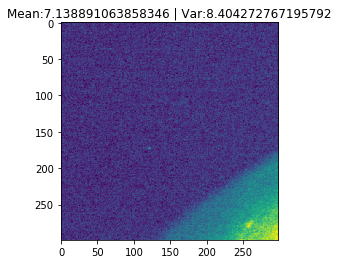

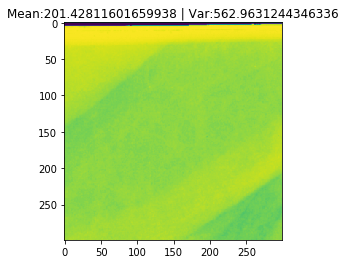

In [34]:
# look at some slices to make sure everything looks good
N = 20
idxs = random.sample(range(len(dba_slices)), k=N)

for i in idxs:
    plt.imshow(dba_slices[i].reshape(299,299))
    plt.title("Mean:" + str(np.mean(dba_slices[i])) + " | Var:" + str(np.var(dba_slices[i])))
    plt.show()

In [35]:
np.save(os.path.join("data", "dba_slices10.npy"), dba_slices)
np.save(os.path.join("data", "dba_labels10.npy"), dba_labels)

## Lumisys Slices

In [24]:
path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\Lumisys pngs"
path = "C:\\Users\\eric\\Documents\\Courses\\Applied ML 2\\mammography\\data\\ddsm\\Lumisys pngs"

#lumisys_slices, lumisys_labels = create_slices(path, var_upper_threshhold=1000, var_lower_threshhold=30, mean_threshold=60)
lumisys_slices, lumisys_labels = create_slices(path, var_upper_threshhold=10000, var_lower_threshhold=10, mean_threshold=28, stride=350)

0 - B_3600_1.LEFT_CC.LJPEG.png


C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


1 - B_3600_1.LEFT_MLO.LJPEG.png
2 - B_3600_1.RIGHT_CC.LJPEG.png
3 - B_3600_1.RIGHT_MLO.LJPEG.png
4 - B_3601_1.LEFT_CC.LJPEG.png
5 - B_3601_1.LEFT_MLO.LJPEG.png
6 - B_3601_1.RIGHT_CC.LJPEG.png
7 - B_3601_1.RIGHT_MLO.LJPEG.png
8 - B_3602_1.LEFT_CC.LJPEG.png
9 - B_3602_1.LEFT_MLO.LJPEG.png
10 - B_3602_1.RIGHT_CC.LJPEG.png
11 - B_3602_1.RIGHT_MLO.LJPEG.png
12 - B_3603_1.LEFT_CC.LJPEG.png
13 - B_3603_1.LEFT_MLO.LJPEG.png
14 - B_3603_1.RIGHT_CC.LJPEG.png
15 - B_3603_1.RIGHT_MLO.LJPEG.png
16 - B_3604_1.LEFT_CC.LJPEG.png
17 - B_3604_1.LEFT_MLO.LJPEG.png
18 - B_3604_1.RIGHT_CC.LJPEG.png
19 - B_3604_1.RIGHT_MLO.LJPEG.png
20 - B_3605_1.LEFT_CC.LJPEG.png
21 - B_3605_1.LEFT_MLO.LJPEG.png
22 - B_3605_1.RIGHT_CC.LJPEG.png
23 - B_3605_1.RIGHT_MLO.LJPEG.png
24 - B_3606_1.LEFT_CC.LJPEG.png
25 - B_3606_1.LEFT_MLO.LJPEG.png
26 - B_3606_1.RIGHT_CC.LJPEG.png
27 - B_3606_1.RIGHT_MLO.LJPEG.png
28 - B_3607_1.LEFT_CC.LJPEG.png
29 - B_3607_1.LEFT_MLO.LJPEG.png
30 - B_3607_1.RIGHT_CC.LJPEG.png
31 - B_3607_1.RIGHT

246 - B_3662_1.RIGHT_CC.LJPEG.png
247 - B_3662_1.RIGHT_MLO.LJPEG.png
248 - B_3663_1.LEFT_CC.LJPEG.png
249 - B_3663_1.LEFT_MLO.LJPEG.png
250 - B_3663_1.RIGHT_CC.LJPEG.png
251 - B_3663_1.RIGHT_MLO.LJPEG.png
252 - B_3664_1.LEFT_CC.LJPEG.png
253 - B_3664_1.LEFT_MLO.LJPEG.png
254 - B_3664_1.RIGHT_CC.LJPEG.png
255 - B_3664_1.RIGHT_MLO.LJPEG.png
256 - B_3665_1.LEFT_CC.LJPEG.png
257 - B_3665_1.LEFT_MLO.LJPEG.png
258 - B_3665_1.RIGHT_CC.LJPEG.png
259 - B_3665_1.RIGHT_MLO.LJPEG.png
260 - B_3666_1.LEFT_CC.LJPEG.png
261 - B_3666_1.LEFT_MLO.LJPEG.png
262 - B_3666_1.RIGHT_CC.LJPEG.png
263 - B_3666_1.RIGHT_MLO.LJPEG.png
264 - B_3667_1.LEFT_CC.LJPEG.png
265 - B_3667_1.LEFT_MLO.LJPEG.png
266 - B_3667_1.RIGHT_CC.LJPEG.png
267 - B_3667_1.RIGHT_MLO.LJPEG.png
268 - B_3668_1.LEFT_CC.LJPEG.png
269 - B_3668_1.LEFT_MLO.LJPEG.png
270 - B_3668_1.RIGHT_CC.LJPEG.png
271 - B_3668_1.RIGHT_MLO.LJPEG.png
272 - B_3669_1.LEFT_CC.LJPEG.png
273 - B_3669_1.LEFT_MLO.LJPEG.png
274 - B_3669_1.RIGHT_CC.LJPEG.png
275 - B_3669_1

In [25]:
print("Lumisys Slices:", len(lumisys_slices))
print("Lumisys Labels:", len(lumisys_labels))

Lumisys Slices: 7232
Lumisys Labels: 7232


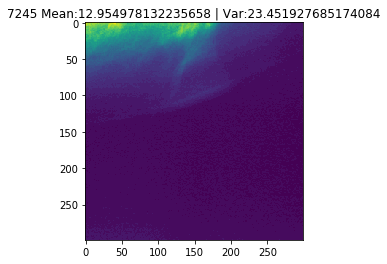

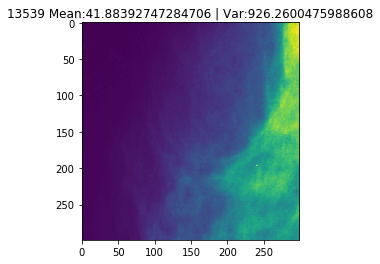

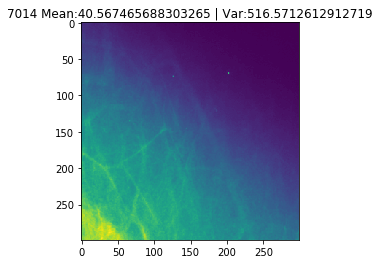

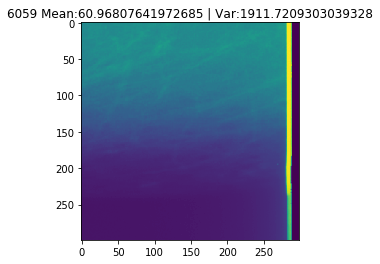

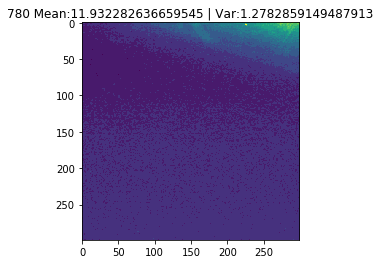

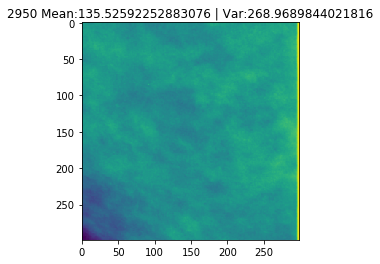

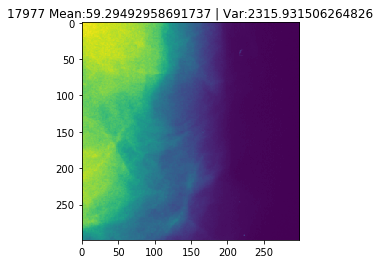

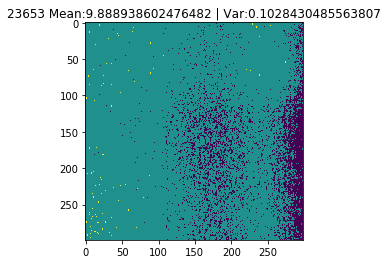

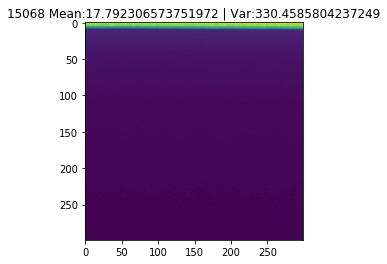

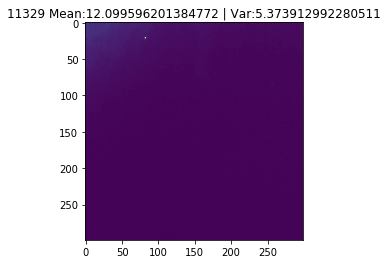

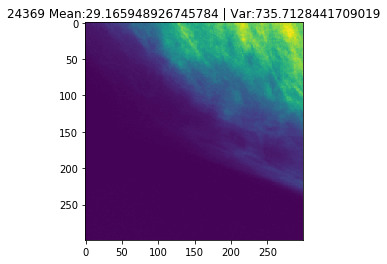

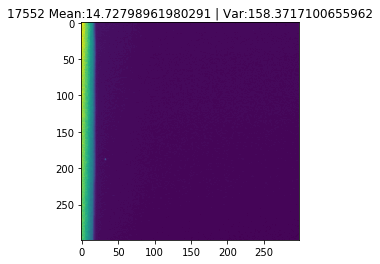

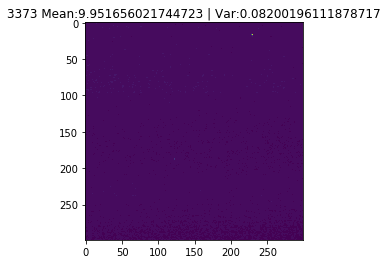

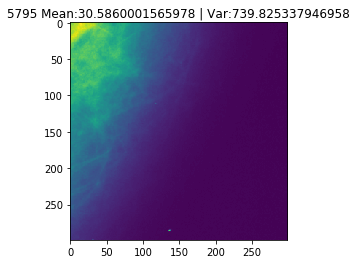

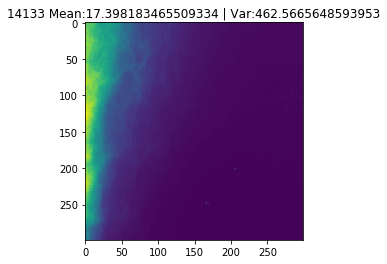

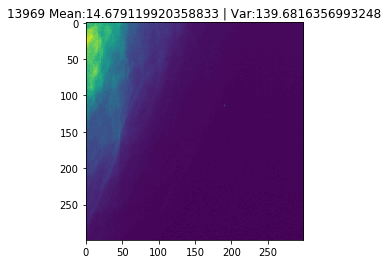

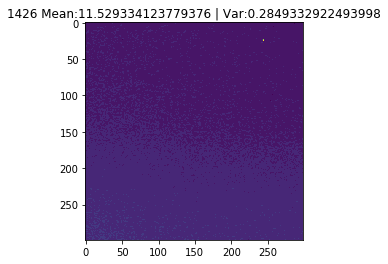

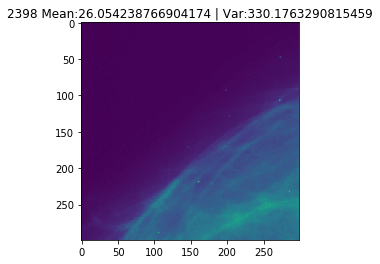

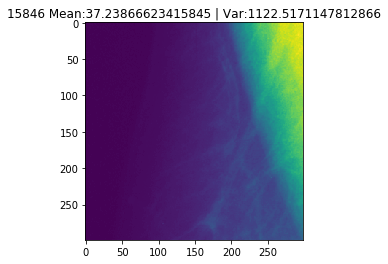

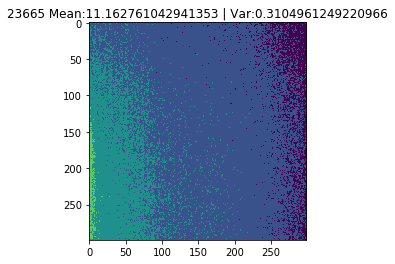

In [15]:
# look at some slices to make sure everything looks good
N = 20
idxs = random.sample(range(len(lumisys_slices)), k=N)

for i in idxs:
    plt.imshow(lumisys_slices[i].reshape(299,299))
    plt.title(str(i) + " Mean:" + str(np.mean(lumisys_slices[i])) + " | Var:" + str(np.var(lumisys_slices[i])))
    plt.show()

In [26]:
np.save(os.path.join("data", "lumisys_slices10.npy"), lumisys_slices)
np.save(os.path.join("data", "lumisys_labels10.npy"), lumisys_labels)

## Howtek

In [27]:
path = "E:\\Documents\\Mammography\\DDSM\\PNGs\\Howtek pngs"

# use a copy on the local drive to try to speed this up a bit
path = "C:\\Users\\eric\\Documents\\Courses\\Applied ML 2\\mammography\\data\\ddsm\\Howtek pngs"

# create the slices
howtek_slices, howtek_labels = create_slices(path, var_upper_threshhold=10000, var_lower_threshhold=10, mean_threshold=30, stride=350)

0 - A_1955_1.LEFT_CC.LJPEG.png


C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\eric\Anaconda2\envs\exts-aml2\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


1 - A_1955_1.LEFT_MLO.LJPEG.png
2 - A_1955_1.RIGHT_CC.LJPEG.png
3 - A_1955_1.RIGHT_MLO.LJPEG.png
4 - A_1956_1.LEFT_CC.LJPEG.png
5 - A_1956_1.LEFT_MLO.LJPEG.png
6 - A_1956_1.RIGHT_CC.LJPEG.png
7 - A_1956_1.RIGHT_MLO.LJPEG.png
8 - A_1957_1.LEFT_CC.LJPEG.png
9 - A_1957_1.LEFT_MLO.LJPEG.png
10 - A_1957_1.RIGHT_CC.LJPEG.png
11 - A_1957_1.RIGHT_MLO.LJPEG.png
12 - A_1958_1.LEFT_CC.LJPEG.png
13 - A_1958_1.LEFT_MLO.LJPEG.png
14 - A_1958_1.RIGHT_CC.LJPEG.png
15 - A_1958_1.RIGHT_MLO.LJPEG.png
16 - A_1959_1.LEFT_CC.LJPEG.png
17 - A_1959_1.LEFT_MLO.LJPEG.png
18 - A_1959_1.RIGHT_CC.LJPEG.png
19 - A_1959_1.RIGHT_MLO.LJPEG.png
20 - A_1960_1.LEFT_CC.LJPEG.png
21 - A_1960_1.LEFT_MLO.LJPEG.png
22 - A_1960_1.RIGHT_CC.LJPEG.png
23 - A_1960_1.RIGHT_MLO.LJPEG.png
24 - A_1961_1.LEFT_CC.LJPEG.png
25 - A_1961_1.LEFT_MLO.LJPEG.png
26 - A_1961_1.RIGHT_CC.LJPEG.png
27 - A_1961_1.RIGHT_MLO.LJPEG.png
28 - A_1962_1.LEFT_CC.LJPEG.png
29 - A_1962_1.LEFT_MLO.LJPEG.png
30 - A_1962_1.RIGHT_CC.LJPEG.png
31 - A_1962_1.RIGHT

246 - D_4515_1.RIGHT_MLO.LJPEG.png
247 - D_4516_1.LEFT_CC.LJPEG.png
248 - D_4516_1.LEFT_MLO.LJPEG.png
249 - D_4516_1.RIGHT_CC.LJPEG.png
250 - D_4516_1.RIGHT_MLO.LJPEG.png
251 - D_4517_1.LEFT_CC.LJPEG.png
252 - D_4517_1.LEFT_MLO.LJPEG.png
253 - D_4517_1.RIGHT_CC.LJPEG.png
254 - D_4517_1.RIGHT_MLO.LJPEG.png
255 - D_4518_1.LEFT_CC.LJPEG.png
256 - D_4518_1.LEFT_MLO.LJPEG.png
257 - D_4518_1.RIGHT_CC.LJPEG.png
258 - D_4518_1.RIGHT_MLO.LJPEG.png
259 - D_4519_1.LEFT_CC.LJPEG.png
260 - D_4519_1.LEFT_MLO.LJPEG.png
261 - D_4519_1.RIGHT_CC.LJPEG.png
262 - D_4519_1.RIGHT_MLO.LJPEG.png
263 - D_4520_1.LEFT_CC.LJPEG.png
264 - D_4520_1.LEFT_MLO.LJPEG.png
265 - D_4520_1.RIGHT_CC.LJPEG.png
266 - D_4520_1.RIGHT_MLO.LJPEG.png
267 - D_4521_1.LEFT_CC.LJPEG.png
268 - D_4521_1.LEFT_MLO.LJPEG.png
269 - D_4521_1.RIGHT_CC.LJPEG.png
270 - D_4521_1.RIGHT_MLO.LJPEG.png
271 - D_4522_1.LEFT_CC.LJPEG.png
272 - D_4522_1.LEFT_MLO.LJPEG.png
273 - D_4522_1.RIGHT_CC.LJPEG.png
274 - D_4522_1.RIGHT_MLO.LJPEG.png
275 - D_4523_

487 - D_4581_1.LEFT_CC.LJPEG.png
488 - D_4581_1.LEFT_MLO.LJPEG.png
489 - D_4581_1.RIGHT_CC.LJPEG.png
490 - D_4581_1.RIGHT_MLO.LJPEG.png
491 - D_4586_1.LEFT_CC.LJPEG.png
492 - D_4586_1.LEFT_MLO.LJPEG.png
493 - D_4586_1.RIGHT_CC.LJPEG.png
494 - D_4586_1.RIGHT_MLO.LJPEG.png
495 - D_4596_1.LEFT_CC.LJPEG.png
496 - D_4596_1.LEFT_MLO.LJPEG.png
497 - D_4596_1.RIGHT_CC.LJPEG.png
498 - D_4596_1.RIGHT_MLO.LJPEG.png
499 - D_4597_1.LEFT_CC.LJPEG.png
500 - D_4597_1.LEFT_MLO.LJPEG.png
501 - D_4597_1.RIGHT_CC.LJPEG.png
502 - D_4597_1.RIGHT_MLO.LJPEG.png
503 - D_4598_1.LEFT_CC.LJPEG.png
504 - D_4598_1.LEFT_MLO.LJPEG.png
505 - D_4598_1.RIGHT_CC.LJPEG.png
506 - D_4598_1.RIGHT_MLO.LJPEG.png
507 - D_4599_1.LEFT_CC.LJPEG.png
508 - D_4599_1.LEFT_MLO.LJPEG.png
509 - D_4599_1.RIGHT_CC.LJPEG.png
510 - D_4599_1.RIGHT_MLO.LJPEG.png
511 - D_4600_1.LEFT_CC.LJPEG.png
512 - D_4600_1.LEFT_MLO.LJPEG.png
513 - D_4600_1.RIGHT_CC.LJPEG.png
514 - D_4600_1.RIGHT_MLO.LJPEG.png
515 - D_4601_1.LEFT_CC.LJPEG.png
516 - D_4601_1.

In [28]:
print("Howtek Slices:", len(howtek_slices))
print("Howtek Labels:", len(howtek_labels))

Howtek Slices: 12506
Howtek Labels: 12506


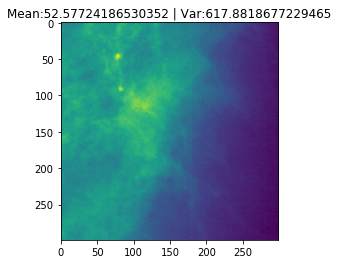

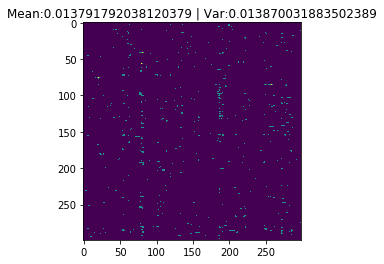

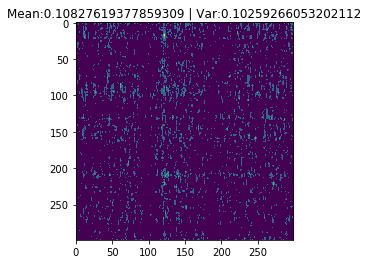

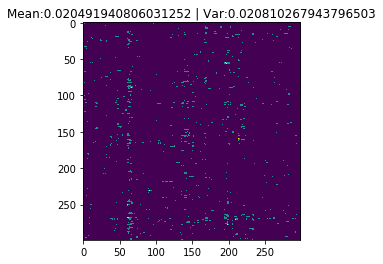

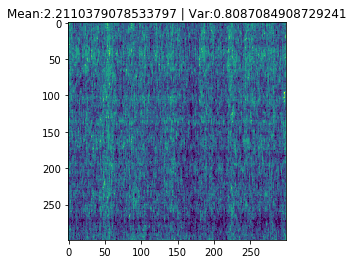

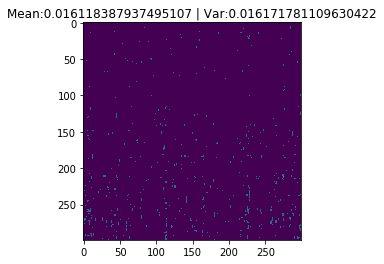

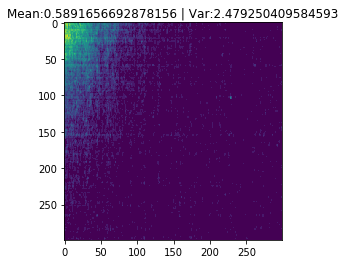

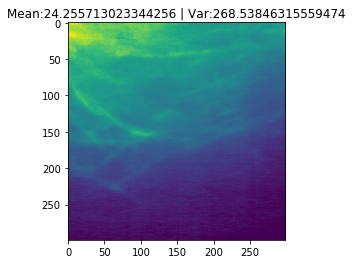

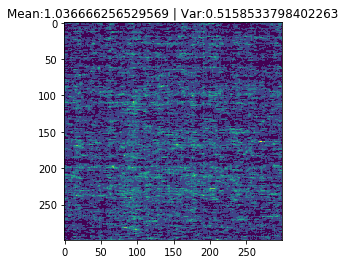

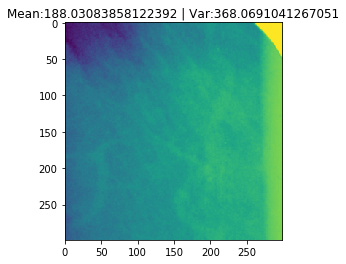

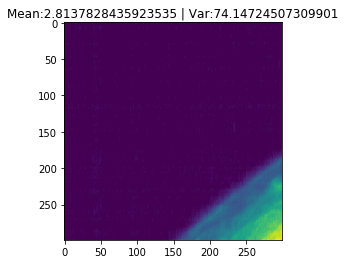

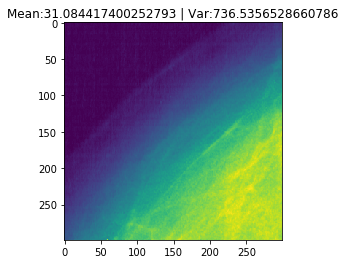

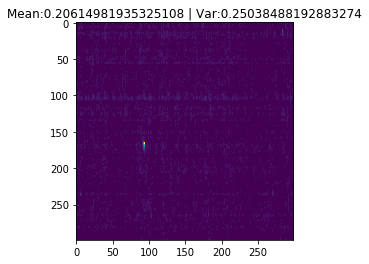

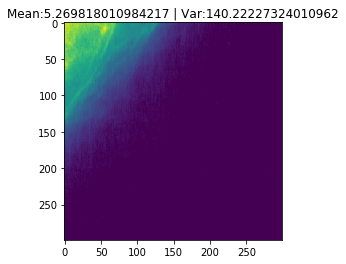

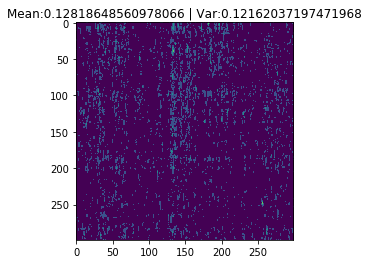

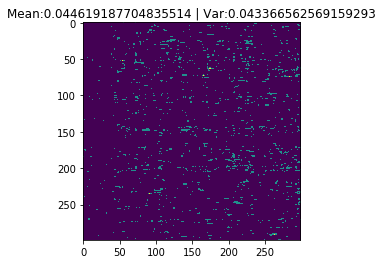

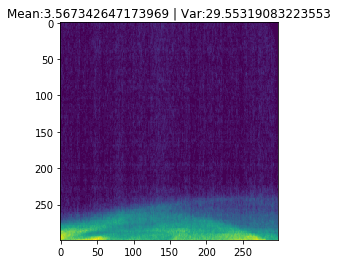

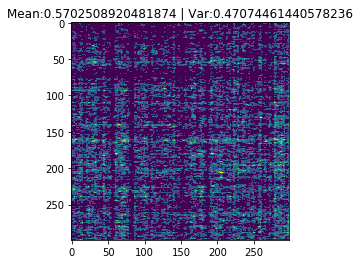

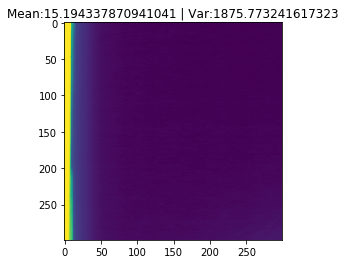

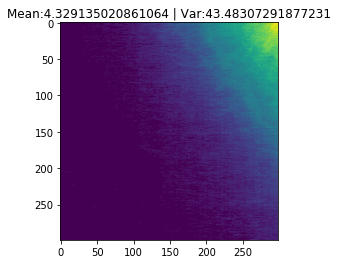

In [29]:
# look at some slices to make sure everything looks good
N = 20
idxs = random.sample(range(len(howtek_slices)), k=N)

for i in idxs:
    plt.imshow(howtek_slices[i].reshape(299,299))
    plt.title("Mean:" + str(np.mean(howtek_slices[i])) + " | Var:" + str(np.var(howtek_slices[i])))
    plt.show()

In [30]:
np.save(os.path.join("data", "howtek_slices10.npy"), howtek_slices)
np.save(os.path.join("data", "howtek_labels10.npy"), howtek_labels)